In [168]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [169]:
# Load the dataset of Bustton house
boston = pd.read_csv('Bostton_House.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [170]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [171]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [172]:
boston.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [173]:
# Define the testing set  == y value
target_column = 'MEDV'
y_column = boston[target_column]
y_column

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [174]:
# Define the trainig set  == x value
x_column = boston.drop(target_column,axis=1)
x_column

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [175]:
# Reshape the data to a 2D array-like object
X = y_column.values.reshape(-1, 1)
# Create an instance of SimpleImputer and specify the strategy as 'mean'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit the imputer on the data
imputer.fit(X)
# Transform the data by replacing missing values with the mean
y_column = imputer.transform(X)
# retutn the main shape
y_column = imputer.transform(X).flatten()

In [185]:
# prepare the model we will use liner_regression
regression = linear_model.LinearRegression()
# split the data to 33% testing data and 67% training data

x_train , x_test , y_train , y_test = train_test_split(x_column , y_column , test_size=.33 , random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((339, 13), (167, 13), (339,), (167,))

In [186]:
# train the model 
regression.fit(x_train , y_train)

LinearRegression()

In [187]:
y_predict = regression.predict(x_test)
y_predict

array([28.43684993, 38.97711245, 14.32097411, 26.70524399, 17.50597622,
       21.37318407, 17.26832922, 13.05224213, 20.21395845, 22.43939138,
       23.40693622, 15.3335203 , 31.01736462, 19.75280393, 22.3912173 ,
       22.22691696, 19.77438981, 27.53393113, 36.87716624, 17.67220468,
       30.11148915, 31.46360404, 13.19079082, 27.16484105, 19.30511258,
       16.88294397, 23.5606829 , 13.26906256, 22.80657945, 22.05031541,
       23.59977602, 26.83677721, 20.18150537, 23.55982972, 13.25100709,
       19.66669796, 29.17151816, 24.35194812, 24.59590776, 24.89122912,
       16.12918738, 32.86962732, 39.06284102, 19.35582842, 28.24409451,
       18.68000759, 17.54080414, 25.64795561, 17.44995814, 31.25923906,
       19.32011344, 31.00224541, 17.34285311, 27.9059919 , 35.38345796,
       20.8440361 , 18.77293964, 36.90621833, 25.13933462, 13.12827608,
       21.92495242, 31.44052028, 31.90790072, 22.95447742, 22.74542314,
       17.79191576, 19.31361668, 28.49867092, 35.33285082, 12.11

In [188]:
# check the model by using MSE , RMSE , 
from sklearn.metrics import mean_squared_error , mean_absolute_error
MSE = mean_squared_error(y_test , y_predict)
MSE

27.01843198706959

In [180]:
MAE = mean_absolute_error(y_test , y_predict)
MAE

3.962111221329294

In [181]:
RMSE = np.sqrt(mean_squared_error(y_test , y_predict))
RMSE

5.197925738895236

In [189]:
df = pd.DataFrame({'Actuial':y_test , 'Predicted':y_predict , 'Variance': y_test - y_predict})
df.head()

,Actuial,Predicted,Variance
0,23.6,28.436850,-4.836850
1,32.4,38.977112,-6.577112
2,13.6,14.320974,-0.720974
3,22.8,26.705244,-3.905244
4,16.1,17.505976,-1.405976


In [190]:
cl_cofficient = pd.DataFrame()
cl_cofficient["Columns"] = x_train.columns
cl_cofficient['Coefficinet Estmaite'] = pd.Series(regression.coef_)
cl_cofficient

,Columns,Coefficinet Estmaite
0,CRIM,0.160613
1,ZN,0.083754
2,INDUS,-0.136991
3,CHAS,4.264883
4,NOX,-1.137022
5,RM,0.080440
6,AGE,-0.007731
7,DIS,-1.634198
8,RAD,0.042103
9,TAX,-0.009772


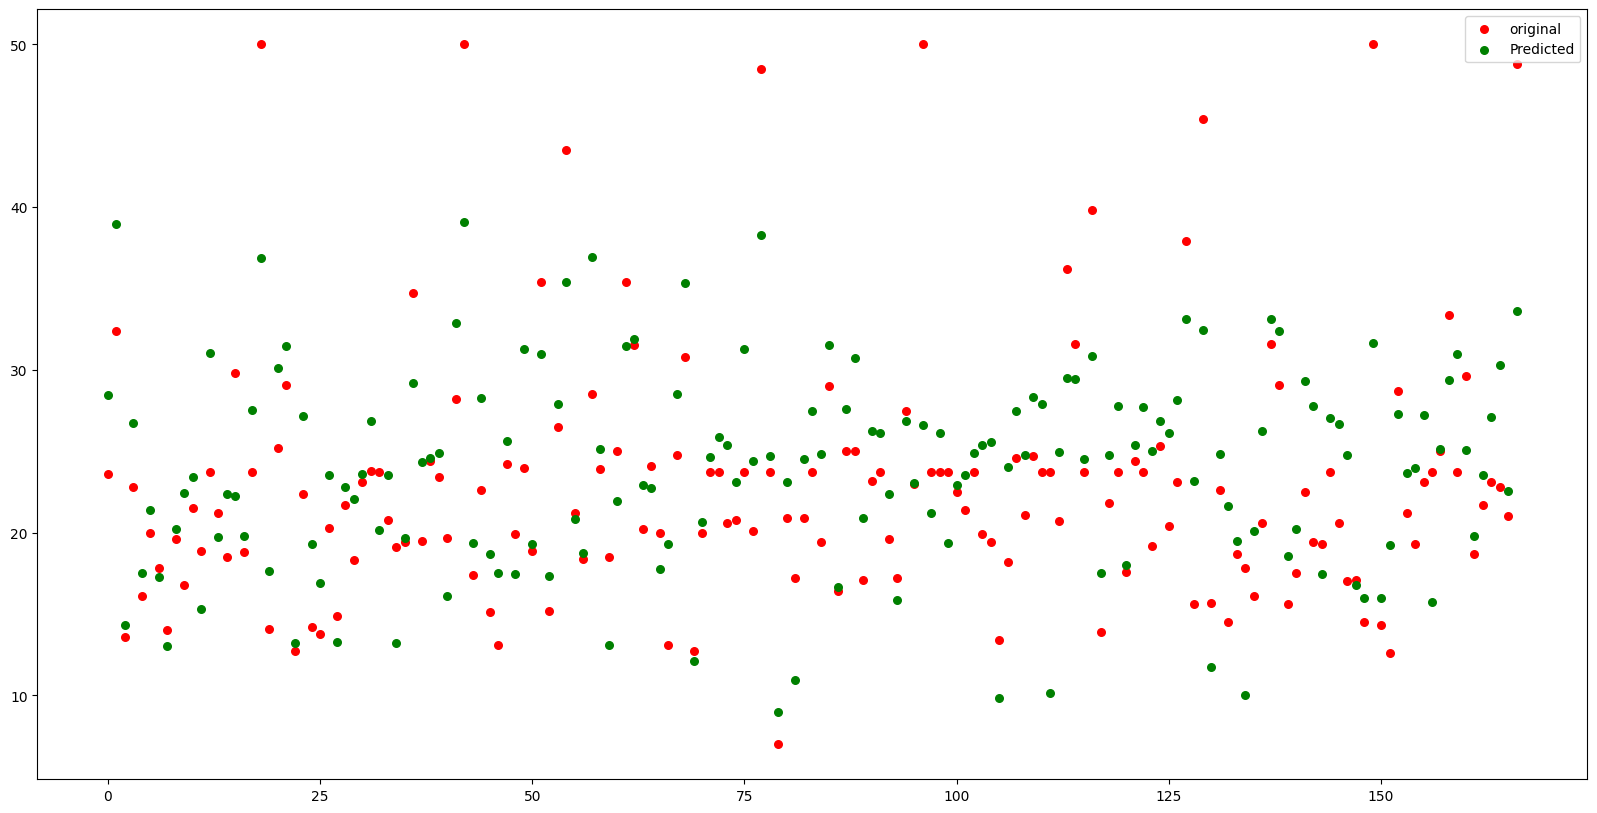

In [191]:
fig , axix = plt.subplots(figsize = (20 , 10))
axix = range(len(x_test))
plt.scatter(axix , y_test , s=30 , color = "red" , label = 'original')
plt.scatter(axix , y_predict , s=30 , color = "green" , label = 'Predicted')
plt.legend()
plt.show()